
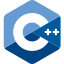
<br>

<div style="text-align:center; font-size:200%;">
 <b>Clean Code: Funktionen (Teil 1)</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 16 Clean Code Funktionen (Teil 1).ipynb -->
<!-- slides/module_420_clean_code/topic_140_functions_part1.cpp -->


[Fasse Operationen, die logisch zusammengehören, als sorgfältig benannte
Funktionen zusammen (CG,
F.1)](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#Rf-package)

- Besser lesbar
- Einfacher zu testen
- Wird eher wiederverwendet
- Fehler sind weniger wahrscheinlich


## Die 1. Clean Code Regel für Funktionen

- Funktionen sollten kurz sein
- Kürzer als man meint!
- Maximal 4 Zeilen!


## C++ Core Guidelines

- [Halte Funktionen kurz und einfach (CG
  F.3)](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#f3-keep-functions-short-and-simple)
  - Funktionen sollten auf einen Bildschirm passen
  - Große Funktionen sollten in kleinere, zusammenhängende und benannte
    Funktionen aufgeteilt werden
  - Funktionen mit einer bis fünf Zeilen sollten als normal angesehen werden


## Konzentration auf eine Aufgabe

- Funktionen sollten eine Aufgabe erfüllen ("do one thing")
- Sie sollten diese Aufgabe gut erfüllen
- Sie sollten nur diese Aufgabe erfüllen
- [Eine Funktion sollte eine einzige logische Aufgabe erfüllen (CG
  F.2)](https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#Rf-logical)

In [ ]:
#include <iostream>
#include <vector>

using namespace std;

In [ ]:
int doStuff(int a, int b, vector<int>& results)
{
    // Get measurement from sensors based on config data...
    int measurement{a + b};
    // ... and perform a complex computation
    int newResult{measurement + 1};
    // ... save the result to the list of results
    if (newResult > 0)
    {
        results.push_back(newResult);
    }
    // ... print all results
    for (int result : results)
    {
        cout << result << endl;
    }
    // ... and return the result
    return newResult;
}

In [ ]:
vector<int> allResults{12, 43};


- Messung und Auswertung der Ergebnisse


- Speichern und Drucken der Ergebnisse:

In [ ]:
#include <iostream>
#include <vector>


- Zusammenführung der Funktionen:


### Fragen

- Macht `performMeasurementAndProcessResult()` das Gleiche wie `doStuff()`?
- Ist die Funktion `performMeasurementAndProcessResult()` wirklich besser?
- Konzentriert sie sich auf eine Aufgabe?
- Unterscheiden sich Ihre Aufgaben von `doStuff()`?
- Warum (nicht)?


## Hilfsmittel: Änderungsgründe

- Welche möglichen Änderungsgründe gibt es?
- Wie viele davon betreffen die jeweilige Funktion?


| Änderungsgrund        | `doStuff()` | `performMeasurementAndProcessResult()` |
| --------------------- | :---------- | :------------------------------------- |
| Messung               | ✓           | ❌ `getMeasurement()`                 |
| Berechnung            | ✓           | ❌ `computeDataForNextTimestep()`     |
| Speichern             | ✓           | ❌ `saveResult()`                     |
| Drucken               | ✓           | ❌ `printResults()`                   |
| Neue/andere Tätigkeit | ✓           | ✓                                     |


# Abstraktionsebenen

- Alles, was die Funktion in ihrem Rumpf tut, sollte eine (und nur eine)
  Abstraktionsebene unterhalb der Funktion selbst sein.
- Beispiel: `performMeasurementAndProcessResult()`
- Gegenbeispiel: `createAndDistributeExam()`:


```cpp
void createAndDistributeExam(const std::string& subject)
{
    // high level abstraction
    Exam exam = createExamUsingChatGPT(subject);

    // low level abstractions
    std::ofstream file(subject + "_exam.pdf");
    writePdfHeader(file);
    for (const auto& question : exam.questions)
    {
        auto pdfQuestion = convertQuestionToPdf(question);
        file << pdfQuestion << "\n";
    }

    // higher level abstraction
    distributeExamToStudents(file);
}
```


## Kontrolle der Abstraktionsebenen: "Um-Zu"-Absätze

`performMeasurementAndProcessResult()`:

Um eine Messung durchzuführen und das Ergebnis zu verarbeiten:
- Hole ein Messergebnis
- Berechne die Daten für den nächsten Zeitschritt
- Speichere das Ergebnis, falls es gültig ist
- Drucke alle Ergebnisse, unabhängig davon, ob das neue Ergebnis gültig ist


## Kommentare als "Um-Zu"-Absätze

- Beim Schreiben von Code können wir das "Um-Zu"-Muster verwenden, um die
  Abstraktionsebenen zu kontrollieren
- Wir können die "Um-Zu"-Absätze als Kommentare schreiben bevor wir den Code
  schreiben
- Meistens wird jeder Absatz zu einer Funktion

In [ ]:
#include <string>

In [ ]:
void processOrder(const std::string& orderID)
{
    // Hole die Bestelldetails anhand der `orderID`
    // Validiere die Lagerverfügbarkeit für jeden Artikel in der Bestellung
    // Aktualisiere den Lagerbestand bei erfolgreicher Validierung
    // Erzeuge eine Lieferung für die Bestellung
    // Benachrichtige den Kunden mit den Lieferdetails
}


## Funktionen als "Um-Zu"-Absätze

Wir können die "Um-Zu"-Absätze auch gleich als Funktionsaufrufe schreiben:


```cpp
void processUserRegistration(
    const std::string& username, const std::string& password,
    const std::string& email
)
{
    validateUserData(username, password, email);
    auto user{createNewUser(username, password, email)};
    sendConfirmationEmail(user);
    logSuccessfulRegistration(user);
}
```


## Die Step-Down-Regel

- Wir wollen, dass sich der Code wie eine Erzählung von oben nach unten liest
- Auf jede Funktion sollten die Funktionen eine Abstraktionsebene darunter
  folgen


## Mini-Workshop: Do one Thing

In `code/starter_kits/salaries_sk` finden Sie eine Funktion
`handle_money_stuff()`.

Diese Funktion macht mehr als eine Sache.

Teilen Sie sie in mehrere Funktionen auf, so dass jede nur eine Sache tut.
Stellen Sie sicher, dass
- jede Funktion ihre Aufgabe gut erfüllt und sich auf einer einzigen
  Abstraktionsebene befindet,
- alle Namen angemessen sind, und
- der Code leicht zu verstehen ist.

*Tipp:* Beginnen Sie damit, die Variablen gemäß den Kommentaren umzubenennen,
um den Rest der Arbeit zu vereinfachen.